# Text Mining : 한국어 처리

## 예제파일 가져오기

In [4]:
from konlpy.corpus import kolaw
c = kolaw.open('constitution.txt').read()

In [14]:
print(type(c)) #가져온 데이터의 type을 확인 --> str
print(len(c))
print(c[:600])

<class 'str'>
18884
대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.

       제1장 총강
  제1조 ① 대한민국은 민주공화국이다.
②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.
  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.
②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.
  제3조 대한민


## NLTK를 이용해 tokenize 하기 (문장 토큰) --> (단어 토큰)

In [19]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
c_sent = sent_tokenize(c)
print(len(c_sent))
print(c_sent[:5])
type(c_sent) # 리스트형으로 저장

357
['대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.', '제1장 총강\n  제1조 ① 대한민국은 민주공화국이다.', '②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.', '제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.', '②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shgus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


list

In [21]:
#문장에서 word로 tokenize
from nltk.tokenize import word_tokenize
c_words = word_tokenize(c)
len(c_words) # 총 4640개 단어가 있음을 알 수 있다. 

4640

In [23]:
" ".join(c_words[:50]) # nltk로는 잘 안되는 것 같다.  

'대한민국헌법 유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고 , 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고 , 모든 사회적 폐습과 불의를 타파하며 , 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히'

## koNLPy의 형태소 분석 및 품사 태깅 기능 사용법

http://konlpy.org/ko/v0.4.3/api/konlpy.tag/ <- 이 사이트에서 사용법 익히자.

morphs(phrase): Parse phrase to morphemes.

nouns(phrase): Noun extractor.

phrases(phrase): Phrase extractor.

pos(phrase, norm=False, stem=False): POS tagger. In contrast to other classes in this subpackage, this POS tagger doesn’t have a flatten option, but has norm and stem options. Check the parameter list below.
매개 변수:

norm – If True, normalize tokens.
stem – If True, stem tokens.

In [28]:
from konlpy.tag import Okt
okt = Okt()
tokens_c = okt.morphs(c) #형태소 단위로 tokenize

In [30]:
len(tokens_c) # 아까는 4640개였지만 지금 보니 8796 개의 단어가 되었음을 알 수 있다.

8796

In [32]:
type(tokens_c) # 역시 리스트 형태로 저장된다.

list

In [34]:
" ".join(tokens_c[:50]) # 제대로 토큰화된 것을 알 수 있다.

'대한민국 헌법 \n\n 유구 한 역사 와 전통 에 빛나는 우리 대 한 국민 은 3 · 1 운동 으로 건립 된 대한민국 임시정부 의 법 통과 불의 에 항거 한 4 · 19 민주 이념 을 계승 하고 , 조국 의 민주 개혁 과 평화 적 통일 의 사명'

## nltk의 Text class를 이용하여 다양한 기능을 수행하기

http://www.nltk.org/_modules/nltk/text.html

https://www.nltk.org/book/ch01.html

In [36]:
import nltk
c_nltk_text = nltk.Text(tokens_c, name = "대한민국헌법") #tokens_c 대신 c를 쓰면 어떻게 될까?
c_nltk_text

<Text: 대한민국헌법>

In [37]:
# 모든 단어의 수
print(len(c_nltk_text.tokens))
# 서로 다른 단어의 수 --> 세트 자료형은 단어의 중복을 허용하지 않기 때문에 리스트형으로 저장된 것과 다른 단어 갯수를 만든다.
print(len(set(c_nltk_text.tokens)))

8796
1364


In [39]:
#단어와 단어의 빈도를 dictionary 형태로 표현
# vocab 함수로 사전형태로 단어의 갯수를 세준다.
c_nltk_text.vocab()

FreqDist({'의': 380, '.': 357, '에': 282, '을': 211, '\n': 195, '은': 179, '제': 178, '이': 176, '한다': 155, '·': 145, ...})

### 그림을 그리기 전 한글 폰트를 설정

In [41]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

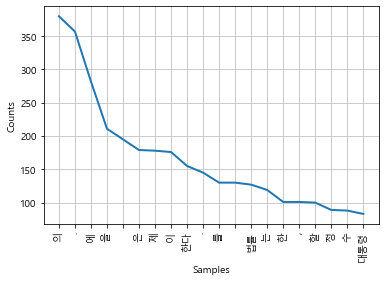

In [42]:
#상위 빈도 단어들의 빈도를 그래프로 출력
%matplotlib inline
c_nltk_text.plot(20)

문제 --> 특수문자, 의, 가, 에 같은 의미없는 문자는 제거해주자.

In [47]:
tokens_new = []
for token in tokens_c:
    if len(token.strip()) > 1: # 스페이스를 제외한 나머지 문자열의 길이가 둘 이상인 단어만 포함
        tokens_new.append(token.strip())
print(len(tokens_new)) # tokens_new 리스트의 갯수를 세준다. ---> 의미있는 단어는 한글자가 아닐 거라는 뜻에서 --> 근데 '못', '해' 같은 단어는 어떻게 해야하나?

4520


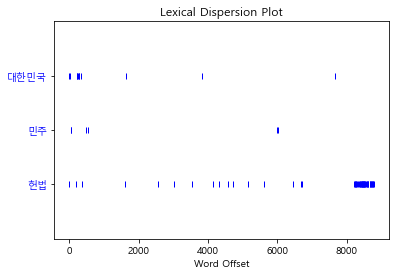

In [49]:
# 단어들 중 주어진 단어들의 위치를 표시
c_nltk_text.dispersion_plot(['대한민국', '민주', '헌법'])

## context를 보는 방법

concordance(): 주어진 단어를 중심으로 앞 뒤의 단어들을 보여 줌

In [60]:
c_nltk_text.concordance('헌법') # 특정 단어의 앞뒤로의 단어들을 보여줌으로써 문맥 파악에 사용될 수 있다.

Displaying 25 of 53 matches:
대한민국 헌법 

 유구 한 역사 와 전통 에 빛나는 우리 대 한 국민 은 3 ·
면서 1948년 7월 12일 에 제정 되고 8 차 에 걸쳐 개정 된 헌법 을 이제 국회 의 의결 을 거쳐 국민투표 에 의하여 개정 한다 . 
 하며 , 그 정치 적 중립성 은 준수 된다 . 
   제 6조 ① 헌법 에 의하여 체결 · 공포 된 조약 과 일반 적 으로 승인 된 국제 
 여 심사 할 의무 를 진다 . 
   제 27조 ① 모든 국민 은 헌법 과 법률 이 정 한 법관 에 의하여 법률 에 의한 재판 을 받을 권
보호 를 받는다 . 
   제 37조 ① 국민 의 자유 와 권리 는 헌법 에 열거 되지 아니한 이유 로 경시 되지 아니 한다 . 
 ② 국민
 인과 부의 장 2 인 을 선출 한다 . 
   제 49조 국회 는 헌법 또는 법률 에 특별한 규정 이 없는 한 재적 의원 과반수 의 출석 
경비 는 전 년도 예산 에 준 하여 집행 할 수 있다 . 
 1 . 헌법 이나 법률 에 의하여 설치 된 기관 또는 시설 의 유지 · 운영 

감사 위원 기타 법률 이 정 한 공무원 이 그 직무 집행 에 있어서 헌법 이나 법률 을 위 배한 때 에는 국회 는 탄핵 의 소 추 를 의결 
 대통령 은 국가 의 독립 · 영토 의 보전 · 국가 의 계속 성과 헌법 을 수호 할 책무 를 진다 . 
 ③ 대통령 은 조국 의 평화 적 
령 은 취임 에 즈음 하여 다음 의 선서 를 한다 . 
 " 나 는 헌법 을 준수 하고 국가 를 보위 하며 조국 의 평화 적 통일 과 국민 
 , 선전포고 와 강화 를 한다 . 
   제 74조 ① 대통령 은 헌법 과 법률 이 정 하는 바 에 의하여 국군 을 통수 한다 . 
 ② 
 대통령 은 이를 해제 하여야 한다 . 
   제 78조 대통령 은 헌법 과 법률 이 정 하는 바 에 의하여 공무원 을 임면한 다 . 
  
반 정책 
 2 . 선전 · 강화 기타 중요한 대외 정책 
 3 . 헌법 개정안 · 국민투표 안 · 

similar() : 주어진 단어와 비슷한 context에서 사용된 단어들을 반환.

In [61]:
c_nltk_text.similar('헌법')

법률 대통령 국회 이 이를 승인 정부 헌법재판소 법원 학문 청원 비상계엄 평생교육 재의 항 예산 연한 국정 국무총리 대법원


collocation is a sequence of words that occur together unusually often.


collocation : 연어(어떤 언어 내에서 특정한 뜻을 나타낼 때 흔히 함께 쓰이는 단어들의 결합)

In [65]:
nltk.download('stopwords')
# 함께 많이 나타난 단어들을 출력
c_nltk_text.collocations()

의하지 아니하고는; 헌법재판소 재판관; 그러하지 아니하다; 인하여 불이익


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shgus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 명사만 추출해서 처리하기 

In [68]:
nc = okt.nouns(c) #nouns_constitution
print(len(nc)) # --> okt 자연어 처리기에 따른 명사의 갯수를 세보자.
print(" ".join(nc[:50]))

3882
대한민국 헌법 유구 역사 전통 우리 국민 운동 건립 대한민국 임시정부 법 통과 불의 항거 민주 이념 계승 조국 민주 개혁 평화 통일 사명 입 각하 정의 인도 동포 애 로써 민족 단결 공고 모든 사회 폐습 불의 타파 자율 조화 바탕 자유민주 질서 더욱 정치 경제 사회 문화 모든


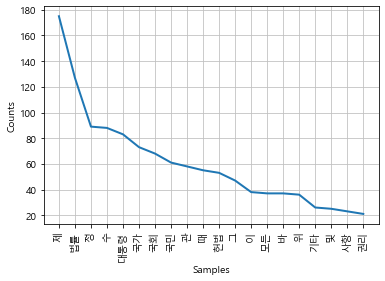

In [69]:
ncnt = nltk.Text(nc, name = "Okt명사")
ncnt.plot(20)

## English Word Cloud
https://github.com/amueller/word_cloud

아나콘다를 쓰는 경우 아래와 같이 install
> conda install -c conda-forge wordcloud

간단한 예제 https://github.com/amueller/word_cloud/blob/master/examples/simple.py

In [70]:
import nltk
nltk.download('gutenberg')
from nltk.corpus import gutenberg   # Docs from project gutenberg.org
files_en = gutenberg.fileids()      # Get file ids
doc_en = gutenberg.open('austen-emma.txt').read()

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\shgus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\gutenberg.zip.


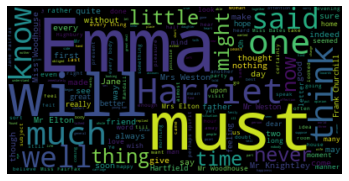

In [71]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud().generate(doc_en)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

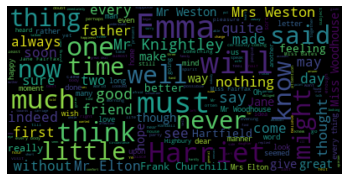

In [72]:
# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(doc_en)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## 한글 Word Cloud

위에서 사용한 WordCloud 패키지를 이용하여 한글 word cloud도 그릴 수 있음
단 그냥 그리면 폰트가 깨지므로 한글폰트를 아래와 같이 지정해주어야 함

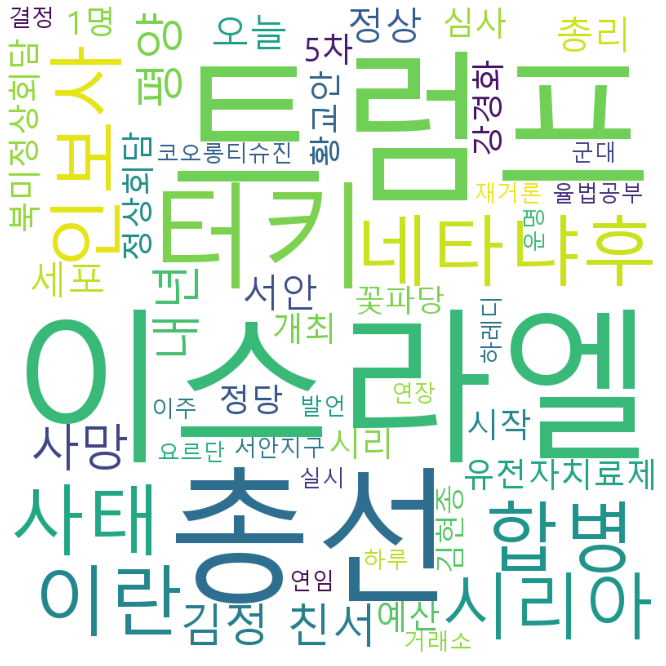

In [73]:
## text 파일로부터 읽어들여 워드클라우드 그리기
import matplotlib.pyplot as plt
from wordcloud import WordCloud
 
font_path = 'c:/Windows/Fonts/malgun.ttf' #한글 폰트의 위치를 지정
wordcloud = WordCloud( #폰트 및 다른 속성들을 지정
    font_path = font_path,
    width = 800,
    height = 800, 
    max_words=50,
    background_color='white' #영어와 달리 배경을 흰색으로
)

text=open('test2.txt').read() #텍스트 파일을 읽음
wordcloud = wordcloud.generate(text) #워드 클라우드 생성
 
fig = plt.figure(figsize=(12,12)) #그림판 크기를 지정
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

['주호영', '추경', '한번', '협치', '제도적', '정착', '7.8조', '4차', '추경', '확정', '국가채무', '846.', '9억', '대비', '43.9', '4차', '추경', '유', '반대', '용혜', '국민', '고통', '심사', '선별', '추경', '국회', '문턱', '2차', '재난지원금', '24일', '특고·프리랜서부터', '지급', '메르켈', '안보', '확대해', '독', '유엔', '개혁', '역할할', '것', '4차', '추경', '11일만', '국회', '통', '통신비', '논란', '추석', '전', '집행', '경찰', "'고수익", '보장', '보험', '미끼', '1천억원', '업자', '구속송치', '200년', '전쟁', '스위스,', '차세대전투기', '도입', '27일', '국민투표', '전광훈', '이단', '여부', '논의', '총회', '양대', '교단', '부산', '식품설명회', '고리', '청주', '80대', '확진자', '등', '접촉', '2명', '확진', '독감백신', '상온', '노출', '업체', '무관', '러시아', '하원', '의원', '50명', '이상', '코로나19', '10명', '입원', '코스피', '코스닥', '다우']
주호영 추경 한번 협치 제도적 정착 7.8조 4차 추경 확정 국가채무 846. 9억 대비 43.9 4차 추경 유 반대 용혜 국민 고통 심사 선별 추경 국회 문턱 2차 재난지원금 24일 특고·프리랜서부터 지급 메르켈 안보 확대해 독 유엔 개혁 역할할 것 4차 추경 11일만 국회 통 통신비 논란 추석 전 집행 경찰 '고수익 보장 보험 미끼 1천억원 업자 구속송치 200년 전쟁 스위스, 차세대전투기 도입 27일 국민투표 전광훈 이단 여부 논의 총회 양대 교단 부산 식품설명회 고리 청주 80대 확진자 등 접촉 2명 확진 독감백신 상온 노출 업체 무관 러시아 하원 의원 50명 이상 코로나19 10명 입원 코스피 코스닥 다우


<Figure size 432x288 with 0 Axes>

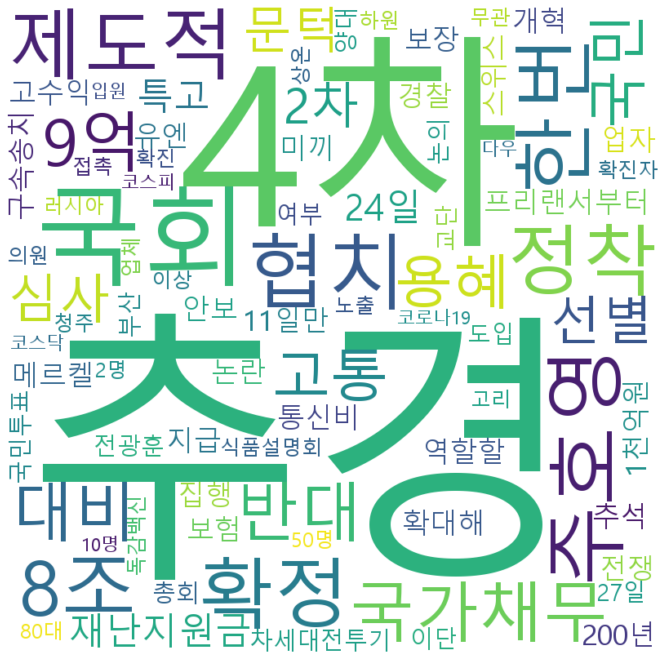

In [76]:
## 다음 한글 기사 읽어오기
from collections import Counter
import random
import webbrowser

from konlpy.tag import Hannanum
import sys
from bs4 import BeautifulSoup
import urllib.request as req


def get_bill_text_daum():
    url1 = "http://media.daum.net" # 다음 뉴스 홈페이지
    res = req.urlopen(url1) # request 모듈. urlopen 함수 사용.
    soup = BeautifulSoup(res, "html.parser") # BeautifulSoup의 html parser 기능사용.

    text2=soup.select("strong.tit_g > a.link_txt") # 뉴스 홈의 헤드라인 부분 텍스트 선택하기
    kk=[a.string for a in text2]
    corpus = ''
    for text in kk:
        text = text.replace('\r','').replace('\n','').replace('\t','') # 전처리를 해준다. 
        corpus = corpus + ' ' +text
     
    return corpus

def get_tags(text, ntags=50, multiplier=10): # 기사에 나타난 단어 50개 가져오기
    h = Hannanum()
    nouns = h.nouns(text)
    count = Counter(nouns)
    return(nouns) # h.nouns으로 text 변수의 값을 단어(명사)로 토큰화 해준다.
   
text = get_bill_text_daum() 
tags = get_tags(text)
# print(tags)
# print(" ".join(tags))

### 워드클라우드 그리기
wordcloud = WordCloud( #폰트 및 다른 속성들을 지정
    font_path = font_path,
    width = 800,
    height = 800, 
   # max_words=50,
    background_color='white' #영어와 달리 배경을 흰색으로
)

wordcloud = wordcloud.generate(" ".join(tags)) #위에서 만든 tags를 이용하여 word cloud 생성
 
fig = plt.figure()
fig = plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear") #글자의 테두리를 매끄럽게... 위의 결과와 비교
plt.axis("off")
plt.show()
fig.savefig('wordcloud_without_axisoff.png') #이미지 파일로 저장

동일한 데이터에 대하여 nltk를 이용해 빈도 그래프 그리기

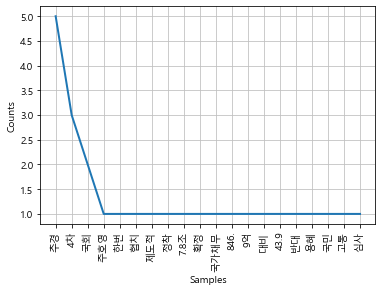

In [77]:
new_tags = []
for token in tags:
    if len(token.strip()) > 1: # 스페이스를 제외한 나머지 문자열의 길이가 둘 이상인 단어만 포함
        new_tags.append(token.strip())

cnt = nltk.Text(new_tags, name = "다음기사수집")
cnt.plot(20)

## 외부 csv파일에서 데이터를 읽어와 필요한 부분에 대해서만 word cloud 그리기

In [79]:
import pandas as pd
df = pd.read_csv('movie_data.csv', header=None, names=['review', 'rate', 'name'])
df.columns.tolist()
#".".join(df.review.tolist())

['review', 'rate', 'name']

In [80]:
df.head() #파일의 내용 미리보기 (상위 5개)

,review,rate,name
0,오~~ 종합선물셋트,9,인피니티 워
1,크레딧 올라올때부터 충격먹었어요 ㅋㅋㅋㅋ 나중에 더큰 활약기대하겠습니다! 와칸다포에...,10,인피니티 워
2,이제 남은건타노스 밖에,10,인피니티 워
3,타노스는 발암물질이다.,9,인피니티 워
4,정말재미있게봤습니다,10,인피니티 워


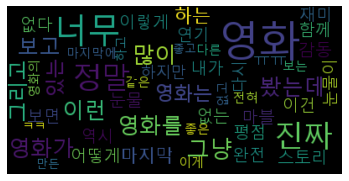

In [81]:
wordcloud = WordCloud(
    font_path = font_path,
    max_font_size = 50,
    #width = 800,
    #height = 800, 
    #background_color='white',
    max_words=50 # 표시될 단어의 갯수 50개로 제한.
)

wordcloud = wordcloud.generate(" ".join(df.review.tolist())) #review column의 내용을 가져와서 word cloud 그리기
 
fig = plt.figure()
#fig = plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
fig.savefig('wordcloud_without_axisoff.png')